# CLIP4
===============================
ให้นักศึกษา ทำต่อไปนี้
1. ตัด Kota_circuit ให้เล็กลง (crop)
2. หา normal vector ของทุกจุด
3. save ลงไฟล์ ply ในแบบ ASCII
4. คัดเลือกจุด ตามเงื่อนไข เช่น z>=.9, -0.2<x<+0.2, -0.2<y<+0.2
5. save ลงไฟล์ ply
6. อ่าน ไฟล์นั้นและแสดงผล

In [2]:
import open3d as o3d
print(o3d.__version__)
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import json

0.18.0


In [2]:
path_kota_circuit2_ply = "Dataset/kota_circuit2.ply"

In [3]:
print("Load a ply point cloud, print it, and render it")
pcd_kota_circuit2 = o3d.io.read_point_cloud(path_kota_circuit2_ply)
print("kota_circuit2:\n",pcd_kota_circuit2)

Load a ply point cloud, print it, and render it
kota_circuit2:
 PointCloud with 14640197 points.


In [4]:
# Script to visualize
path_kota_circuit2_ply = "filtered_ply.ply"
# path_kota_circuit2_ply = "cropped_point_cloud.ply"
pcd_kota_circuit2 = o3d.io.read_point_cloud(path_kota_circuit2_ply)
print("kota_circuit2:\n",pcd_kota_circuit2)

kota_circuit2:
 PointCloud with 96758 points.


In [ ]:
o3d.visualization.draw_geometries([pcd_kota_circuit2])

In [4]:
'''
points np
'''
points_kota_circuit2 = np.asarray(pcd_kota_circuit2.points)
print("kota_circuit2:\n",points_kota_circuit2)

kota_circuit2:
 [[  82.07930756 -147.18885803  -78.15903473]
 [  97.60070801  149.98822021  -53.49351883]
 [  70.49710846 -229.24028015  -78.54177856]
 ...
 [  26.64775658  -36.49408722  -89.59648132]
 [ -88.472229     49.91682816  -75.39753723]
 [ -23.17474937  335.25888062 -102.58750916]]


In [11]:
'''
colors np
'''
colors = np.asarray(pcd_kota_circuit2.colors)
print(colors)

[[0.77647059 0.77647059 0.78431373]
 [0.63137255 0.5254902  0.4       ]
 [0.51764706 0.4745098  0.41960784]
 ...
 [0.35686275 0.32941176 0.23137255]
 [0.03529412 0.04313725 0.03921569]
 [0.19215686 0.25490196 0.19607843]]


In [5]:
# Convert to Polars DataFrame
df = pl.DataFrame(points_kota_circuit2)
# Define new column names
new_column_names = ['X', 'Y', 'Z']
# Rename the columns
df = df.rename({old: new for old, new in zip(df.columns, new_column_names)})
# Show the DataFrame with new column names
print(df)

shape: (14_640_197, 3)
┌────────────┬─────────────┬─────────────┐
│ X          ┆ Y           ┆ Z           │
│ ---        ┆ ---         ┆ ---         │
│ f64        ┆ f64         ┆ f64         │
╞════════════╪═════════════╪═════════════╡
│ 82.079308  ┆ -147.188858 ┆ -78.159035  │
│ 97.600708  ┆ 149.98822   ┆ -53.493519  │
│ 70.497108  ┆ -229.24028  ┆ -78.541779  │
│ -76.048126 ┆ -211.369736 ┆ -77.776176  │
│ 170.869736 ┆ -31.368572  ┆ -42.127758  │
│ …          ┆ …           ┆ …           │
│ 39.064766  ┆ -49.574154  ┆ -89.212524  │
│ 97.69825   ┆ 332.724731  ┆ -86.537941  │
│ 26.647757  ┆ -36.494087  ┆ -89.596481  │
│ -88.472229 ┆ 49.916828   ┆ -75.397537  │
│ -23.174749 ┆ 335.258881  ┆ -102.587509 │
└────────────┴─────────────┴─────────────┘


In [6]:
x_min = df['X'].min()
y_min = df['Y'].min()
z_min = df['Z'].min()

x_max = df['X'].max()
y_max = df['Y'].max()
z_max = df['Z'].max()

# Display the minimum value
print("X: ", x_min, " - ", x_max)
print("Y: ", y_min, " - ", y_max)
print("Z: ", z_min, " - ", z_max)

X:  -198.72598266601562  -  260.0782165527344
Y:  -366.9369812011719  -  444.7239685058594
Z:  -142.478515625  -  -4.9731879234313965


/Users/kitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


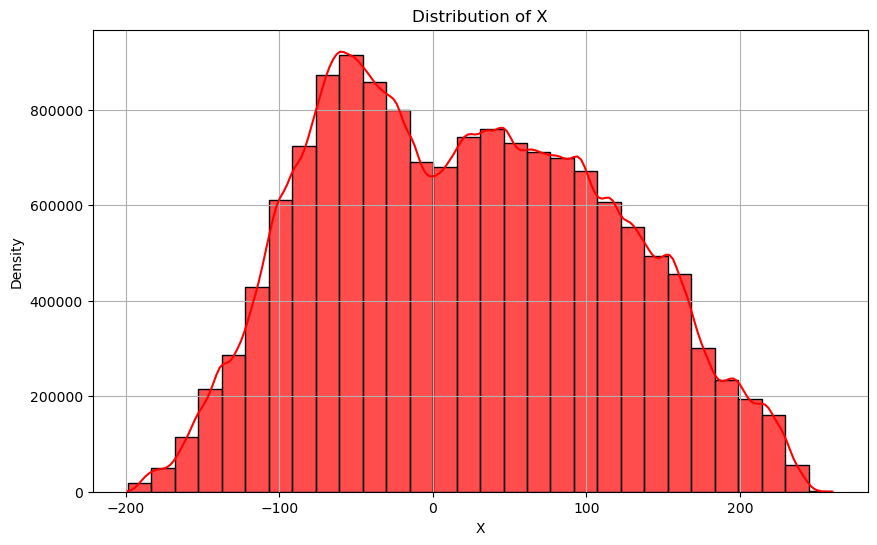

In [7]:
# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['X'], kde=True, color='red', bins=30, alpha=0.7, edgecolor='black')

# Alternatively, for just the KDE without the histogram, you can use sns.kdeplot:
# sns.kdeplot(df_pandas['X'], color='blue', shade=True)

plt.title('Distribution of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/Users/kitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


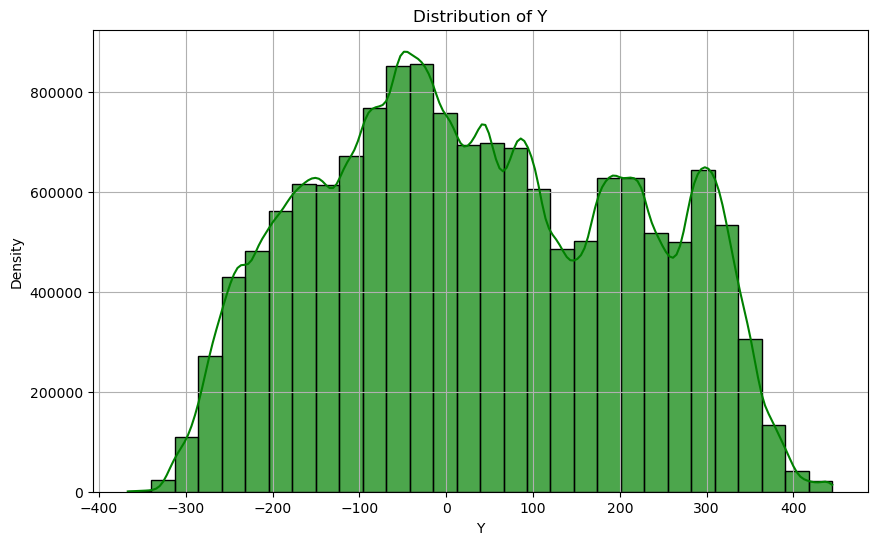

In [8]:
# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['Y'], kde=True, color='green', bins=30, alpha=0.7, edgecolor='black')

plt.title('Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.grid(True)
plt.show()

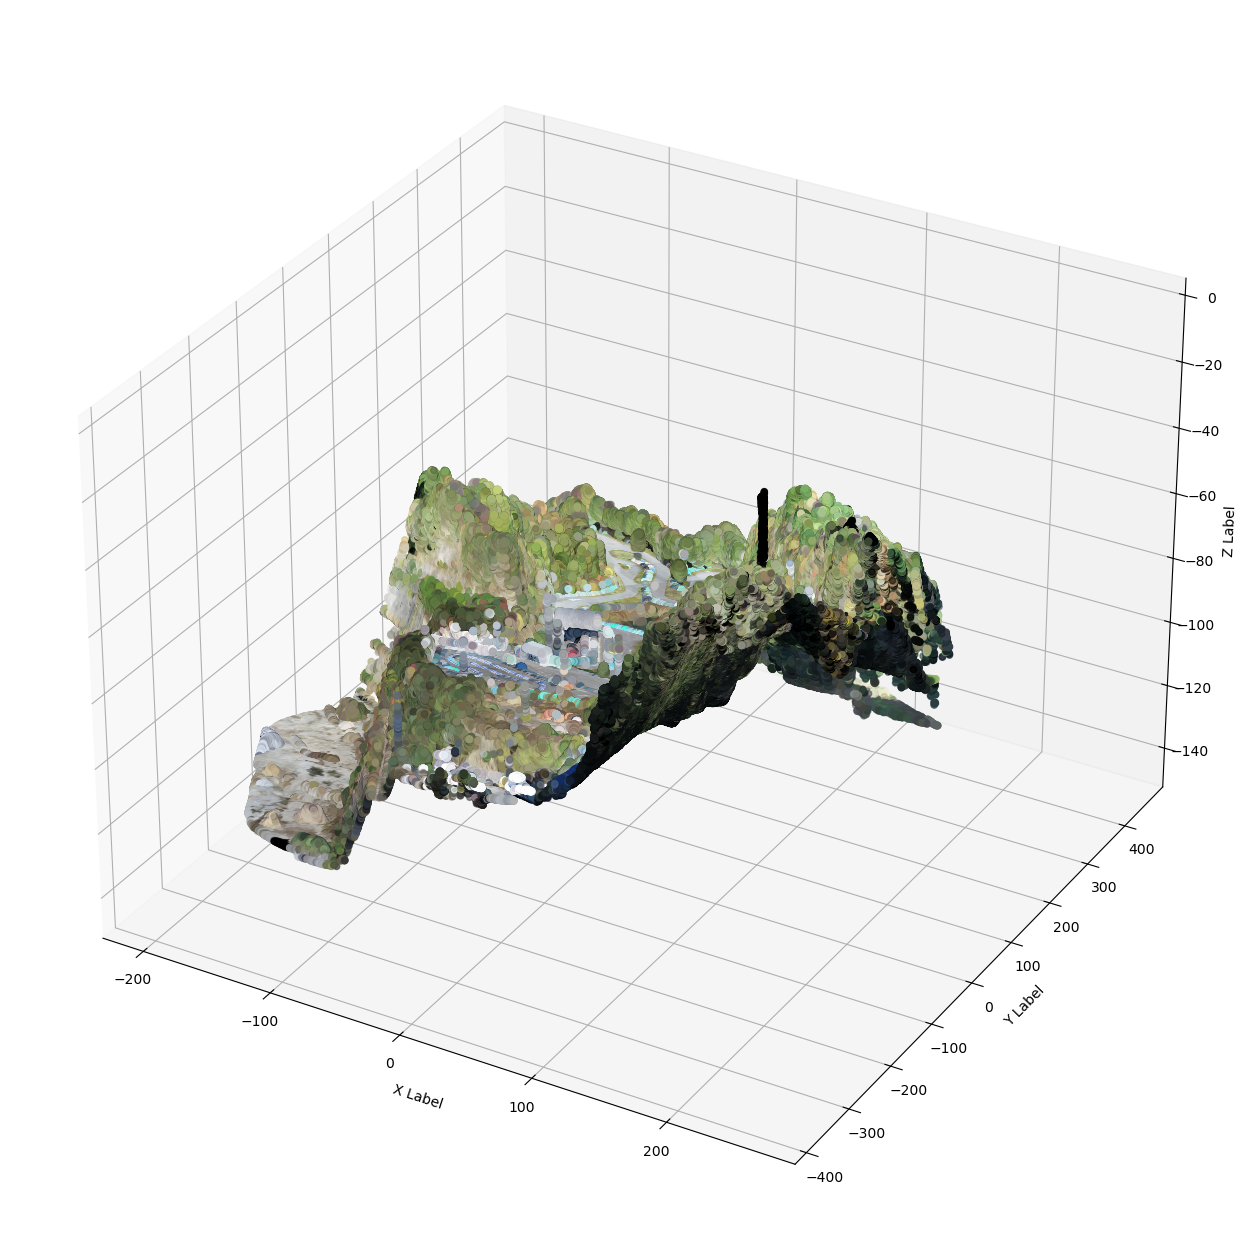

In [12]:
fig = plt.figure(figsize=(18, 16))  # Increase figure size to 18 inches by 16 inches
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_kota_circuit2[:, 0], points_kota_circuit2[:, 1], points_kota_circuit2[:, 2], c=colors, marker='o', alpha=0.6, edgecolors=colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

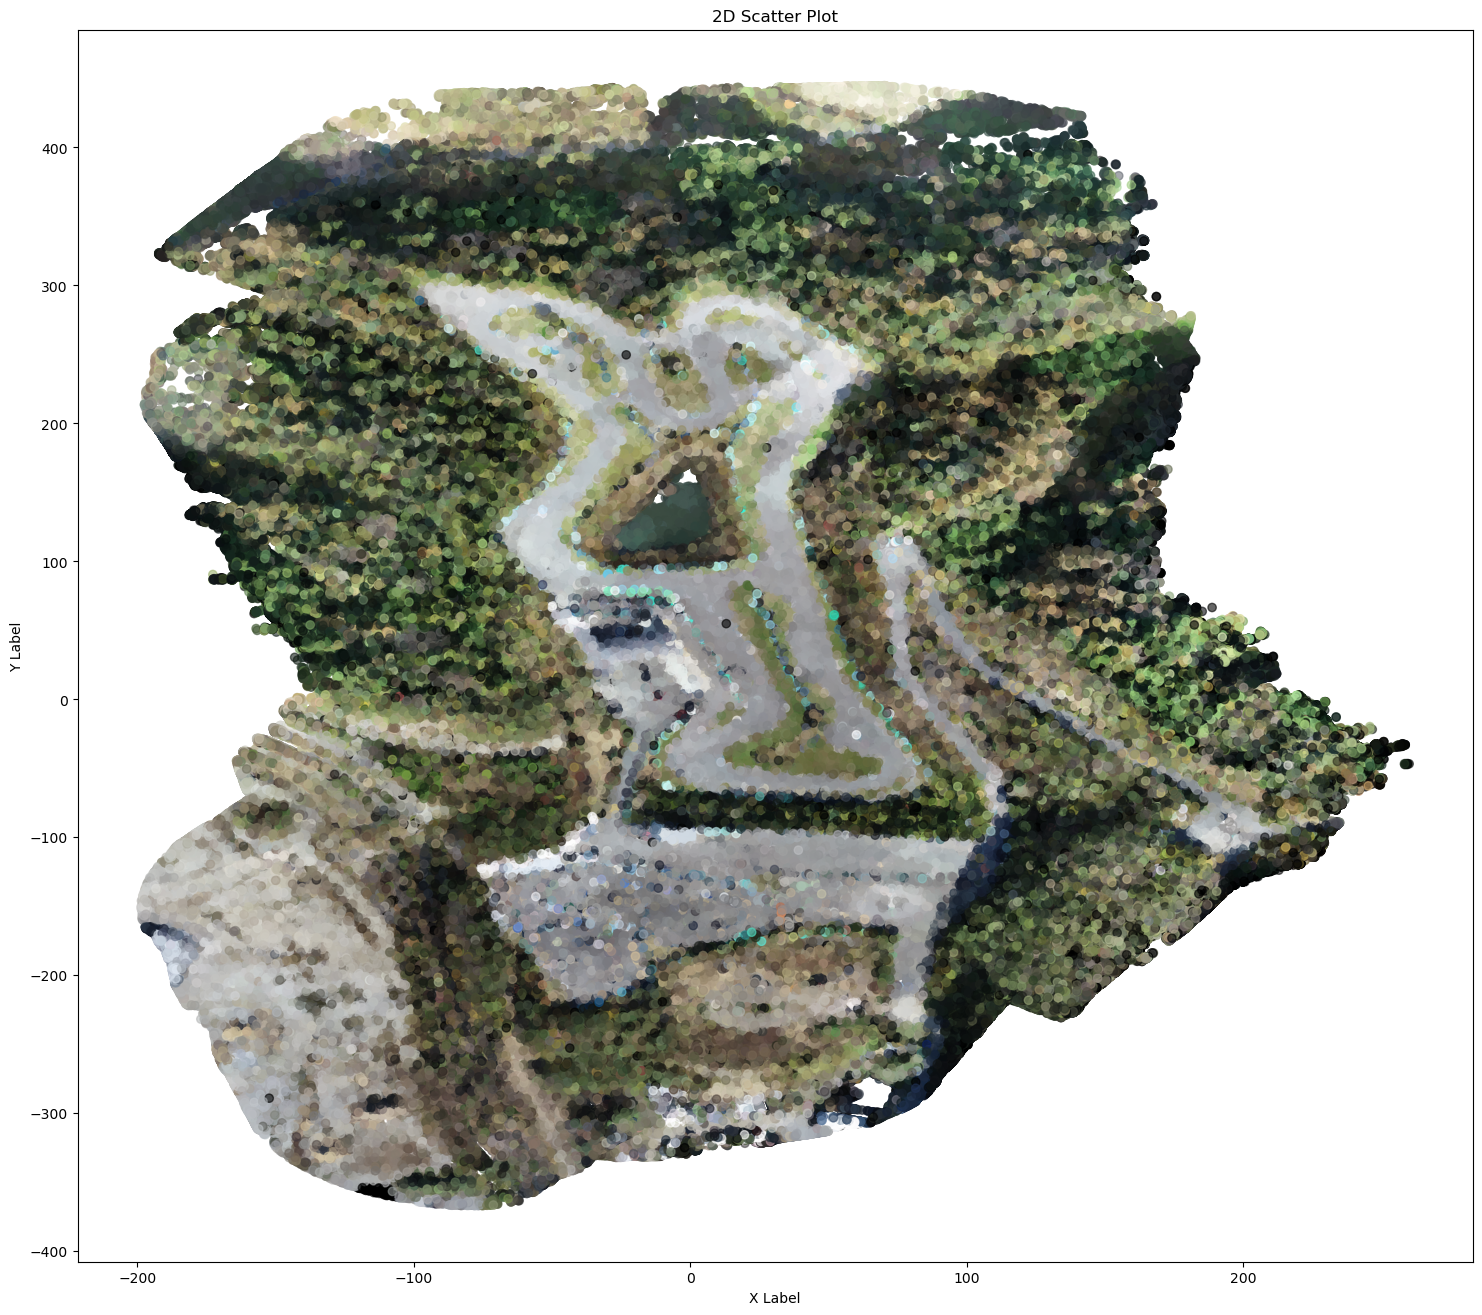

In [23]:
# 2D Scatter plot
plt.figure(figsize=(18, 16))  # Set figure size
plt.scatter(points_kota_circuit2[:, 0], points_kota_circuit2[:, 1], c=colors, alpha=0.6, edgecolors=colors)

plt.xlabel('X Label')  # Set X-axis label
plt.ylabel('Y Label')  # Set Y-axis label
plt.title('2D Scatter Plot')  # Optional: Set the title of the plot

# Save the plot as an image file
plt.savefig('plot_image.png', dpi=300)
plt.show()

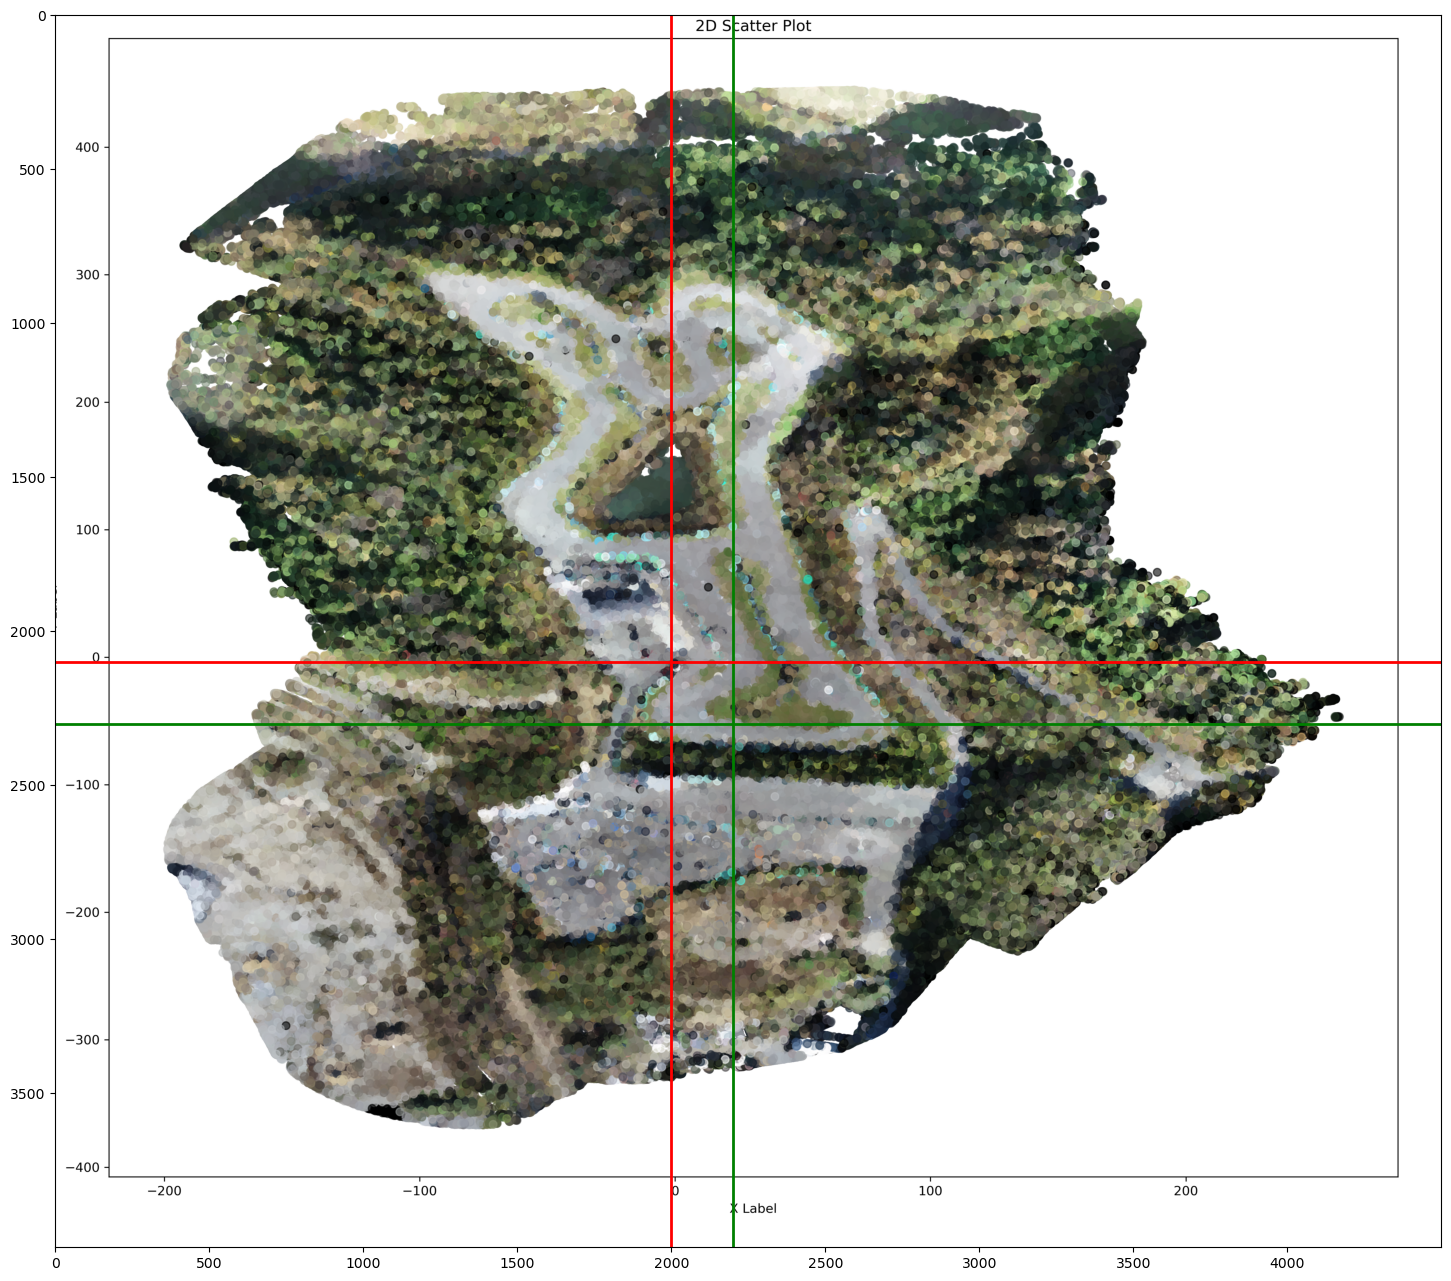

In [51]:
# Load an image from file
image_path = 'plot_image.png'  # Update this to the path of your image file
image = plt.imread(image_path)

# Display the image
plt.figure(figsize=(18, 16))  # Set figure size
plt.imshow(image[500:4500,500:5000])

# Add a red line at the cropped image's "new" x=0 (left edge)
plt.axvline(x=2000, color='r', linestyle='-', linewidth=2)
plt.axvline(x=2200, color='g', linestyle='-', linewidth=2)

plt.axhline(y=2100, color='r', linestyle='-', linewidth=2)
plt.axhline(y=2300, color='g', linestyle='-', linewidth=2)

plt.show()

In [52]:
# x 0 - 50
# y -50 - 0

In [53]:
'''
Z:  -142.478515625  -  -4.9731879234313965
'''
min_x, max_x = 0, 50
min_y, max_y = -50, 0
min_z, max_z = -142.478515625, -4.9731879234313965

In [54]:
# Define the bounding box (AABB) for cropping
bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=(min_x, min_y, min_z),
                                           max_bound=(max_x, max_y, max_z))

In [55]:
# Prepare the data to be saved in JSON format
bbox_data = {
    "min_bound": bbox.min_bound.tolist(), # Convert numpy array to list
    "max_bound": bbox.max_bound.tolist()
}

# Save the bounding box data to a JSON file
with open('bbox_data.json', 'w') as outfile:
    json.dump(bbox_data, outfile)

In [56]:
# Load the bounding box data from the JSON file
with open('bbox_data.json', 'r') as infile:
    loaded_bbox_data = json.load(infile)

# Convert lists back to numpy arrays and create the bounding box
loaded_bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=loaded_bbox_data["min_bound"],
                                                  max_bound=loaded_bbox_data["max_bound"])

In [57]:
# Crop the point cloud using the loaded bounding box
cropped_pcd = pcd_kota_circuit2.crop(loaded_bbox)

In [58]:
# Save the cropped point cloud to a new .ply file
o3d.io.write_point_cloud("cropped_point_cloud.ply", cropped_pcd)

True

In [60]:
print("kota_circuit2_cropped:\n",cropped_pcd)

kota_circuit2_cropped:
 PointCloud with 171173 points.


In [59]:
'''
points np
'''
points_cropped_kota_circuit2 = np.asarray(cropped_pcd.points)
print("kota_circuit2:\n",points_cropped_kota_circuit2)

kota_circuit2:
 [[  6.01937342  -1.38532341 -90.3157196 ]
 [ 45.31009674 -33.54266357 -89.5683136 ]
 [ 15.35226154 -24.83808517 -89.81398773]
 ...
 [  1.55587244 -27.29068756 -89.49342346]
 [ 39.06476593 -49.5741539  -89.21252441]
 [ 26.64775658 -36.49408722 -89.59648132]]


In [61]:
'''
colors np
'''
cropped_colors = np.asarray(cropped_pcd.colors)
print(cropped_colors)

[[0.78431373 0.76862745 0.76470588]
 [0.36470588 0.44313725 0.2627451 ]
 [0.59607843 0.59607843 0.61568627]
 ...
 [0.63921569 0.63137255 0.65490196]
 [0.41960784 0.44705882 0.29019608]
 [0.35686275 0.32941176 0.23137255]]


In [62]:
x_min = df['X'].min()
y_min = df['Y'].min()
z_min = df['Z'].min()

x_max = df['X'].max()
y_max = df['Y'].max()
z_max = df['Z'].max()

# Display the minimum value
print("X: ", x_min, " - ", x_max)
print("Y: ", y_min, " - ", y_max)
print("Z: ", z_min, " - ", z_max)

X:  -198.72598266601562  -  260.0782165527344
Y:  -366.9369812011719  -  444.7239685058594
Z:  -142.478515625  -  -4.9731879234313965


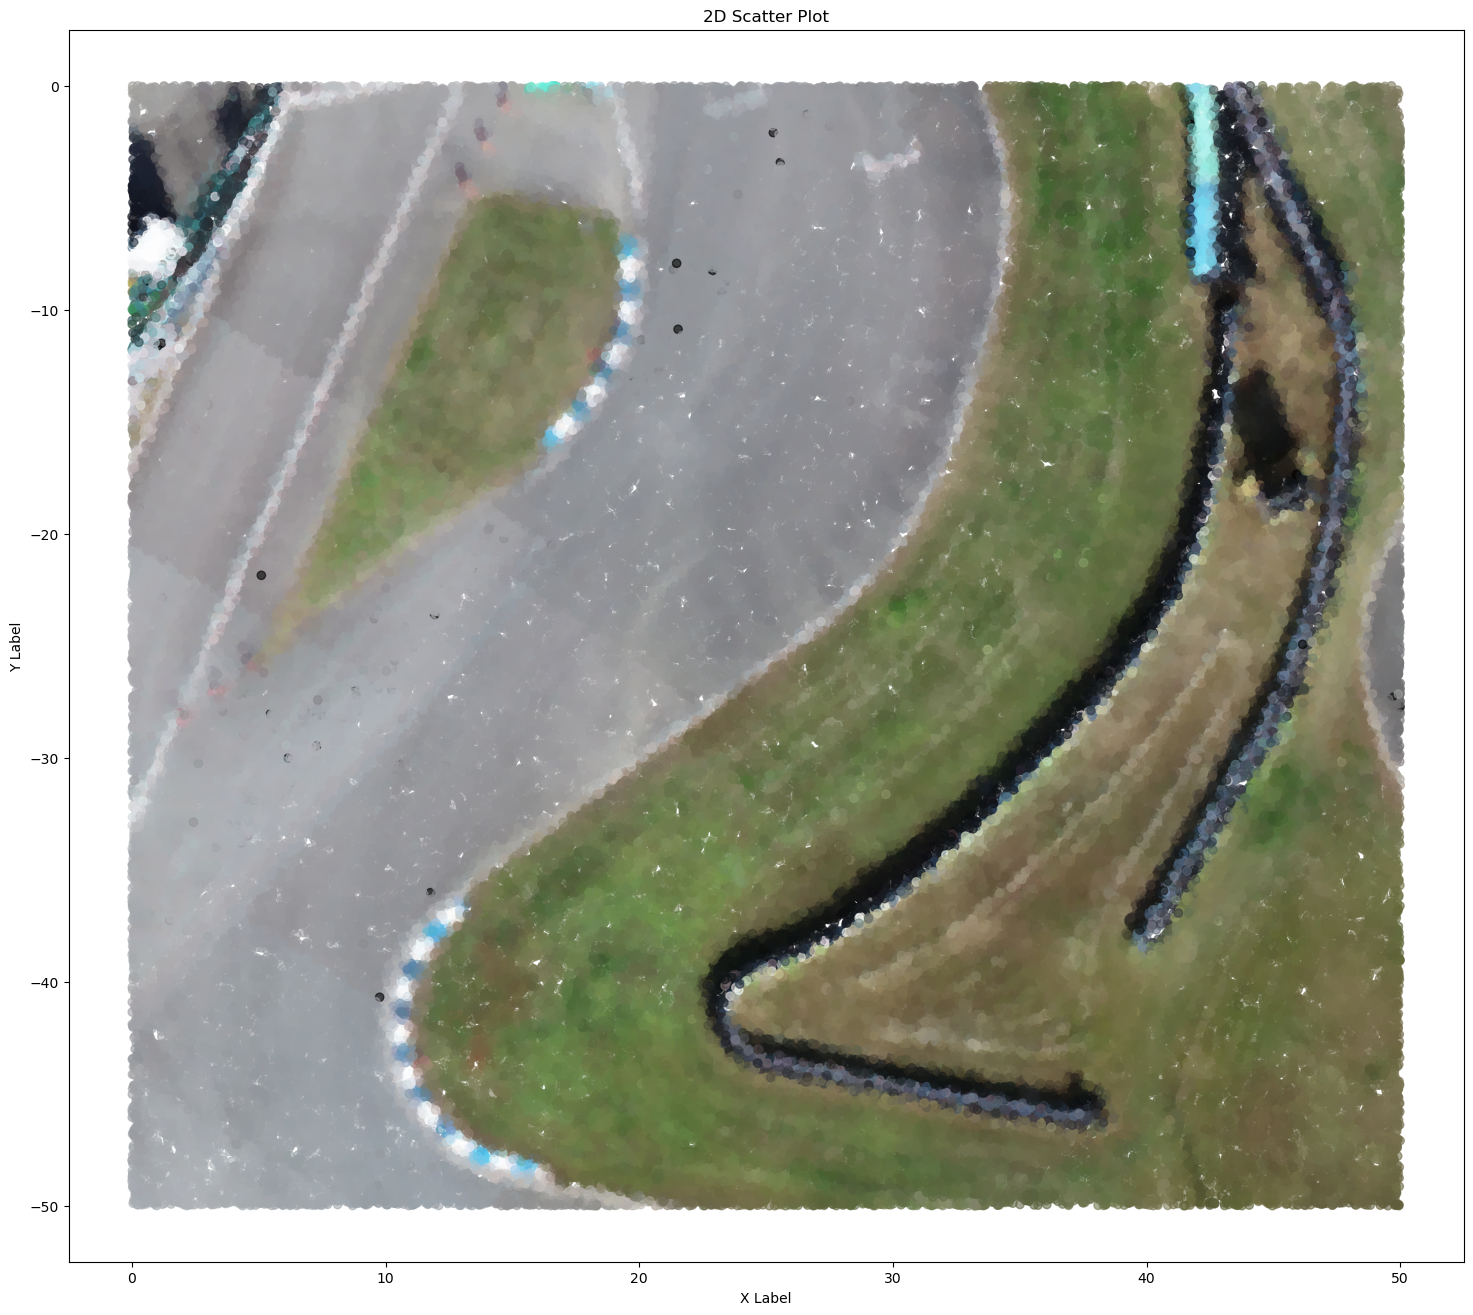

In [65]:
# 2D Scatter plot
plt.figure(figsize=(18, 16))  # Set figure size
plt.scatter(points_cropped_kota_circuit2[:, 0], points_cropped_kota_circuit2[:, 1], c=cropped_colors, alpha=0.6, edgecolors=cropped_colors)

plt.xlabel('X Label')  # Set X-axis label
plt.ylabel('Y Label')  # Set Y-axis label
plt.title('2D Scatter Plot')  # Optional: Set the title of the plot

# Save the plot as an image file
plt.savefig('plot_cropped_image.png', dpi=300)
plt.show()

In [66]:
cropped_pcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

In [67]:
# Save the point cloud with normals in ASCII format
output_path = "ascii_ply.ply"  # Specify your output path
o3d.io.write_point_cloud(output_path, cropped_pcd, write_ascii=True)

True

In [73]:
# Define the path to your text file
file_path = 'ascii_ply.ply'

# Initialize an empty list to hold the data
data = []

# Initialize a variable to track whether the endheader has been passed
found_endheader = False

# Read the file
with open(file_path, 'r') as file:
    for line in file:
        if found_endheader:
            # Process the line to create a row for the DataFrame
            # Adjust the splitting based on your actual data format
            row = line.strip().split()  # Splitting by comma for CSV format
            data.append(row)
        elif "end_header" in line:
            found_endheader = True
'''
property double x
property double y
property double z
property double nx
property double ny
property double nz
property uchar red
property uchar green
property uchar blue
'''
df = pl.DataFrame(data, schema=['x', 'y', 'z', 'nx', 'ny', 'nz', 'red', 'green', 'blue'])  # Example column names

# Display the DataFrame
print(df)

shape: (171_173, 9)
┌─────────┬──────────┬──────────┬───────────┬───┬────────────┬─────┬───────┬──────┐
│ x       ┆ y        ┆ z        ┆ nx        ┆ … ┆ nz         ┆ red ┆ green ┆ blue │
│ ---     ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---        ┆ --- ┆ ---   ┆ ---  │
│ str     ┆ str      ┆ str      ┆ str       ┆   ┆ str        ┆ str ┆ str   ┆ str  │
╞═════════╪══════════╪══════════╪═══════════╪═══╪════════════╪═════╪═══════╪══════╡
│ 6.01937 ┆ -1.38532 ┆ -90.3157 ┆ 0         ┆ … ┆ 1          ┆ 200 ┆ 196   ┆ 195  │
│ 45.3101 ┆ -33.5427 ┆ -89.5683 ┆ 0.678292  ┆ … ┆ -0.606227  ┆ 93  ┆ 113   ┆ 67   │
│ 15.3523 ┆ -24.8381 ┆ -89.814  ┆ 0         ┆ … ┆ 1          ┆ 152 ┆ 152   ┆ 157  │
│ 10.9924 ┆ -22.6989 ┆ -89.7636 ┆ 0         ┆ … ┆ 1          ┆ 167 ┆ 171   ┆ 174  │
│ 25.4226 ┆ -40.8105 ┆ -89.4978 ┆ 0         ┆ … ┆ 1          ┆ 118 ┆ 110   ┆ 72   │
│ …       ┆ …        ┆ …        ┆ …         ┆ … ┆ …          ┆ …   ┆ …     ┆ …    │
│ 47.3356 ┆ -48.8036 ┆ -89.1729 ┆ 0.321904  ┆ … ┆ -0.636

In [77]:
# Apply the filtering conditions to keep rows that match and drop those that do not
filtered_df = df.filter(
    (df['nz'] >= 0.9) &
    (df['nx'].gt(-0.2) & df['nx'].lt(0.2)) &  # Using .gt() and .lt() for greater than and less than
    (df['ny'].gt(-0.2) & df['ny'].lt(0.2))
)

# Display the filtered DataFrame
print(filtered_df)

shape: (96_758, 9)
┌──────────┬──────────┬──────────┬───────────┬───┬──────────┬─────┬───────┬──────┐
│ x        ┆ y        ┆ z        ┆ nx        ┆ … ┆ nz       ┆ red ┆ green ┆ blue │
│ ---      ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---      ┆ --- ┆ ---   ┆ ---  │
│ str      ┆ str      ┆ str      ┆ str       ┆   ┆ str      ┆ str ┆ str   ┆ str  │
╞══════════╪══════════╪══════════╪═══════════╪═══╪══════════╪═════╪═══════╪══════╡
│ 6.01937  ┆ -1.38532 ┆ -90.3157 ┆ 0         ┆ … ┆ 1        ┆ 200 ┆ 196   ┆ 195  │
│ 15.3523  ┆ -24.8381 ┆ -89.814  ┆ 0         ┆ … ┆ 1        ┆ 152 ┆ 152   ┆ 157  │
│ 10.9924  ┆ -22.6989 ┆ -89.7636 ┆ 0         ┆ … ┆ 1        ┆ 167 ┆ 171   ┆ 174  │
│ 25.4226  ┆ -40.8105 ┆ -89.4978 ┆ 0         ┆ … ┆ 1        ┆ 118 ┆ 110   ┆ 72   │
│ 0.895403 ┆ -8.98034 ┆ -89.8768 ┆ 0         ┆ … ┆ 1        ┆ 79  ┆ 144   ┆ 160  │
│ …        ┆ …        ┆ …        ┆ …         ┆ … ┆ …        ┆ …   ┆ …     ┆ …    │
│ 30.0875  ┆ -7.40644 ┆ -90.0362 ┆ 0         ┆ … ┆ 1        ┆ 150 ┆ 

In [99]:
# Open the file in write mode ('w') to create or overwrite the filtered_ply.ply file
with open("filtered_ply.ply", 'w') as file:
    # Open the original file in read mode ('r')
    with open("ascii_ply.ply", 'r') as ori_file:
        # Iterate through each line of the original file
        for line in ori_file:
            # Check if the end_header line has been found
            if "end_header" in line:
                # Set found_endheader to True and stop writing more lines
                file.write(line)
                ori_file.close()  # Manually close the file here
                break
            else:
                if "element vertex" in line:
                    file.write("element vertex {}\n".format(filtered_df.shape[0]))
                    continue
                # Write the current line to the new file
                file.write(line)
    # Iterate through each row of the DataFrame
    for row in filtered_df.to_dicts():  # Convert each row to a dictionary for easy column access
        # Write the value of column 'x' to the file, followed by a newline
        file.write(str(row['x']) + ' ')
        file.write(str(row['y']) + ' ')
        file.write(str(row['z']) + ' ')
        file.write(str(row['nx']) + ' ')
        file.write(str(row['ny']) + ' ')
        file.write(str(row['nz']) + ' ')
        file.write(str(row['red']) + ' ')
        file.write(str(row['green']) + ' ')
        file.write(str(row['blue']) + '\n')

In [101]:
path_filtered_kota_circuit2_ply = "filtered_ply.ply"
filtered_pcd_kota_circuit2 = o3d.io.read_point_cloud(path_filtered_kota_circuit2_ply)
print("filtered kota_circuit2:\n",filtered_pcd_kota_circuit2)

filtered kota_circuit2:
 PointCloud with 96758 points.


In [ ]:
o3d.visualization.draw_geometries([filtered_pcd_kota_circuit2])